In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Описание набора данных

В этом соревновании вам предстоит прогнозировать продажи тысяч групп товаров в магазинах Favorita в Эквадоре. Обучающие данные включают даты, информацию о магазине и товаре, информацию о проводимых акциях, а также данные о продажах. Дополнительные файлы содержат дополнительную информацию, которая может быть полезна при построении ваших моделей.


Описания файлов и информация о полях данных

train.csv

Обучающие данные, включающие временные ряды признаков store_nbr , family и onpromotion , а также целевые продажи .


store_nbr идентифицирует магазин, в котором продается продукция.

семья определяет тип продаваемого продукта.


В поле «Продажи» указан общий объём продаж группы товаров в конкретном магазине на определённую дату. Дробные значения возможны, поскольку товары могут продаваться дробными единицами (например, 1,5 кг сыра вместо 1 пакета чипсов).

onpromotion показывает общее количество товаров в семействе продуктов, которые рекламировались в магазине на определенную дату.

Дополнительные примечания

Заработная плата в государственном секторе выплачивается каждые две недели, 15-го и в последний день месяца. Это может повлиять на продажи в супермаркетах.

16 апреля 2016 года в Эквадоре произошло землетрясение магнитудой 7,8. Люди объединились для оказания помощи, жертвуя воду и другие товары первой необходимости, что существенно повлияло на продажи в супермаркетах в течение нескольких недель после землетрясения.

In [ ]:
df = pd.read_csv("train.csv", index_col='id')

In [ ]:
df.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df.tail()

,date,store_nbr,family,sales,onpromotion
id,,,,,
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,2017-08-15,9,SEAFOOD,16.000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
store_nbr,3000888.0,27.500000,15.585787,1.0,14.0,27.5,41.00000,54.0
sales,3000888.0,357.775749,1101.997721,0.0,0.0,11.0,195.84725,124717.0
onpromotion,3000888.0,2.602770,12.218882,0.0,0.0,0.0,0.00000,741.0


In [ ]:
import seaborn as sns

<Axes: xlabel='sales'>

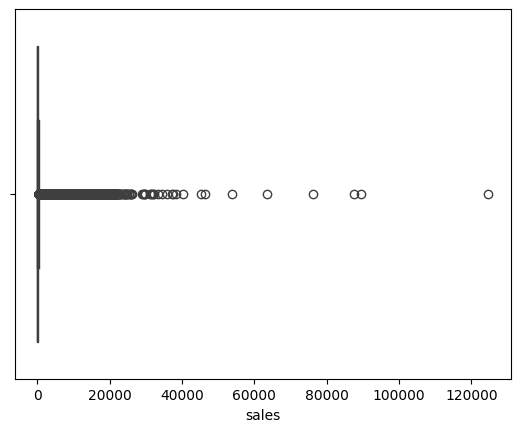

In [ ]:
sns.boxplot(data =  df, x = 'sales')

Цель - проанализировать поведение покупателей по всей сети по всем категориям по дням

In [ ]:
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 137.4+ MB


In [ ]:
df.isnull().sum()

,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0


In [ ]:
df.family.value_counts()

,count
family,
AUTOMOTIVE,90936
BABY CARE,90936
BEAUTY,90936
BEVERAGES,90936
BOOKS,90936
BREAD/BAKERY,90936
CELEBRATION,90936
CLEANING,90936
DAIRY,90936


In [ ]:
df.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


1 Цель - проанализировать поведение покупателей по всей сети по всем категориям по дням

2 Цель - проанализировать поведение покупателей по всей сети по самой популярной по дням

нам нужна группировка по дате и суммарные траты за эту дату

In [ ]:
df_sales = pd.pivot_table(df, values='sales', index='date', aggfunc='sum')
df_sales.head()

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229


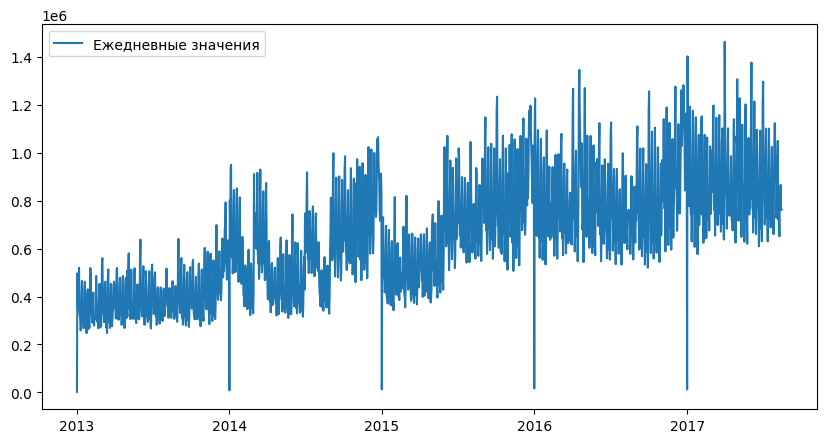

In [ ]:
# Построим графики
plt.figure(figsize=(10, 5))
plt.plot(df_sales.index, df_sales.sales, label='Ежедневные значения')
plt.legend()
plt.show()

In [ ]:
monthly = df_sales.resample('ME').mean()

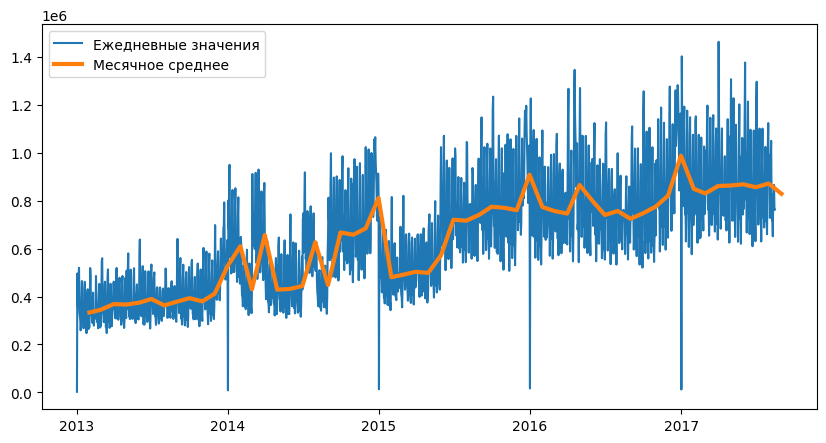

In [ ]:
# Построим графики
plt.figure(figsize=(10, 5))
plt.plot(df_sales.index, df_sales.sales, label='Ежедневные значения')
plt.plot(monthly.index, monthly.sales, label='Месячное среднее', linewidth=3)
plt.legend()
plt.show()


тренд на повышение есть, сезонное увеличение выручки на новый год, некоторые аномальные пики возможно связанные с внешними факторами

In [ ]:
df_sales.query('sales < 50000')

,sales
date,
2013-01-01,2511.618999
2014-01-01,8602.065404
2015-01-01,12773.616980
2016-01-01,16433.394000
2017-01-01,12082.500997


Аномально низкий объем продаж 01 января обусловлен выходным днем после Нового года, может быть часть магазинов не работает

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf  # добавили pacf

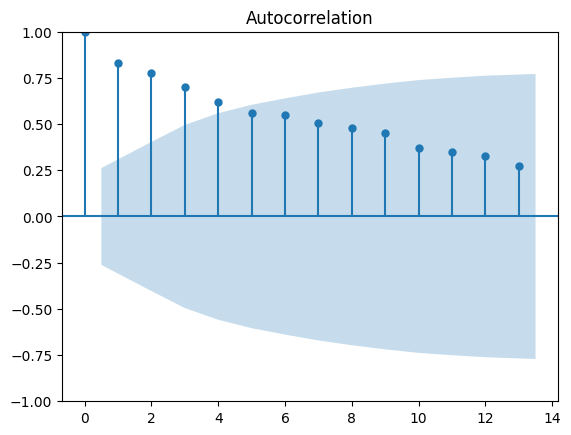

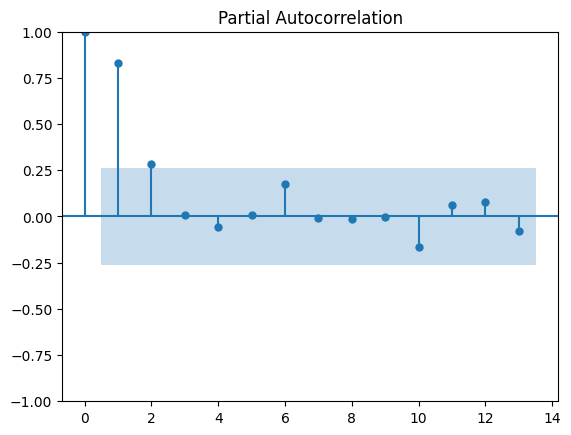

In [ ]:
plot_acf(monthly["sales"], lags=13)
plt.show()

plot_pacf(monthly["sales"], lags=13)
plt.show()


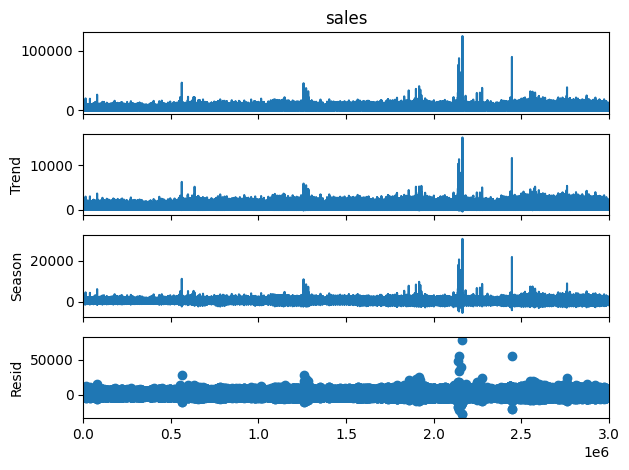

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(df['sales'], period=7)  # 7 — если данные по дням и предполагается недельная сезонность
res = stl.fit()

res.plot()
plt.show()


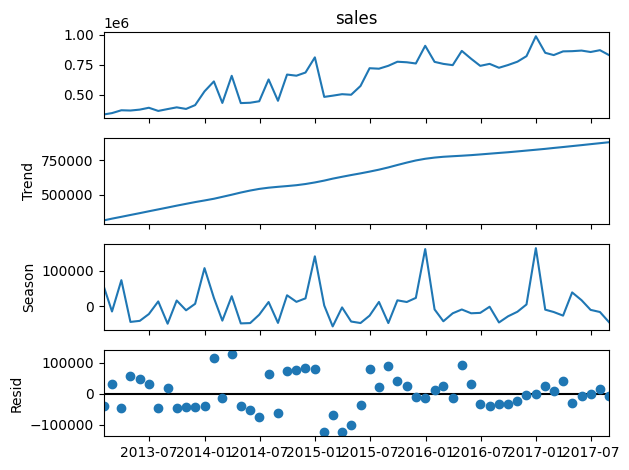

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(monthly['sales'], period=12)  # 12 — предполагается годовая сезонность
res = stl.fit()

res.plot()
plt.show()

Тренд положительный есть, сезонность присутствует

вывод - в этом случае модель справилась

In [ ]:
monthly['trend'] = res.trend
monthly['seasonal'] = res.seasonal
monthly['resid'] = res.resid


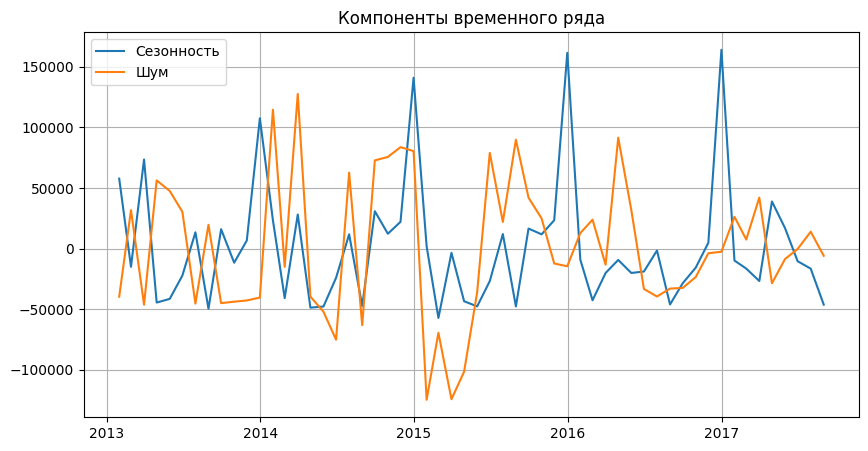

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly['seasonal'], label='Сезонность')
plt.plot(monthly['resid'], label='Шум')
plt.legend()
plt.title('Компоненты временного ряда')
plt.grid(True)
plt.show()


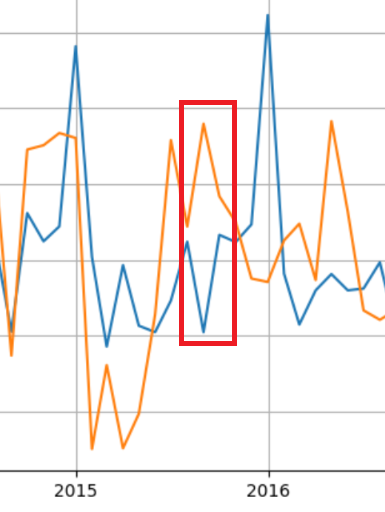

14 авг. 2015 г. — Массовые акции протеста прошли в Эквадоре, пострадали 12 полицейских ... К протестам населения привело решение правительства выдвинуть ..